In [1]:
import os
import matplotlib.pyplot as plt

### 텐서플로우와 판다스 라이브러리를 import하십시오

In [2]:
# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_1 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-098c6e5f-a6ef-46e9-90ed-1067501d504a',
    'IBM_API_KEY_ID': 'bL54Jk8IW2S7vbdyjfUBkqvX_-kIyh6SIvp0NDr3qu2i',
    'ENDPOINT': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.cloud.ibm.com/oidc/token',
    'BUCKET': 'test2-donotdelete-pr-i2y37sb0pwcsre',
    'FILE': 'Offences.csv'
}

### 왓슨 스튜디오 주피터 노트북의 Insert to Code 기능을 이용하여 offences.csv 파일을 판다스 dataframe 포탯으로 읽고 df.head()로 내용을 출력하십시오.

In [3]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_8357b051798746a1938e67a1dd7793fc = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='bL54Jk8IW2S7vbdyjfUBkqvX_-kIyh6SIvp0NDr3qu2i',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_8357b051798746a1938e67a1dd7793fc.get_object(Bucket='test2-donotdelete-pr-i2y37sb0pwcsre',Key='Offences.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Unnamed: 13
0,Abernathy,2821.0,0.0,0.0,NaN,0.0,0.0,0.0,12.0,12.0,0.0,0.0,1.0,NaN
1,Abilene,119401.0,477.0,1.0,NaN,37.0,125.0,314.0,4769.0,1055.0,3460.0,254.0,16.0,NaN
2,Addison,15961.0,51.0,1.0,NaN,4.0,11.0,35.0,784.0,129.0,593.0,62.0,1.0,NaN
3,Alamo,18876.0,164.0,0.0,NaN,11.0,27.0,126.0,1336.0,203.0,1052.0,81.0,1.0,NaN
4,Alamo Heights,7443.0,9.0,0.0,NaN,2.0,2.0,5.0,235.0,36.0,194.0,5.0,0.0,NaN


In [4]:
df= df.loc[:, ['Burglary', 'Murder and\nnonnegligent\nmanslaughter']]
df.columns = ['Burlaries', 'Manslaughter']

###  pandas의 dropna()를 사용하여 NaN이 있는 row들을 삭제하고 그 결과를 원래의 df 오브젝트로 저장하십시오. 
### 참조: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

In [5]:
df= df.dropna(axis=0)

In [6]:
learningRate = 0.0000001
numEpochs = 100

### x와 y 변수 두 개를 tf.placeholder를 사용하여 선언하십시오. dtype은 float32, shape는 [None, ]

In [7]:
import tensorflow as tf

In [8]:
x = tf.placeholder(dtype=tf.float32, shape=None)
y = tf.placeholder(dtype=tf.float32, shape=None)

### w와 b 두 텐서를 모두 0으로 초기화 shape는 [1] 

In [9]:
w = tf.Variable(tf.zeros(shape=[1]))
b = tf.Variable(tf.zeros(shape=[1]))

Instructions for updating:
Colocations handled automatically by placer.


### 아래 셀 중에 your code here 부분을 완성하십시오.

In [10]:
# Predictor변수를 y_pred로 이름짓고 y_pred = x * W + b 텐서 연산을 정의하십시오
y_pred = (x * w + b)


# loss 함수를 최소자승법을 사용하여 정의하십시오. y와 y_pred의 차이의 제곱을 사용
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=y_pred))

# optimizer를 기본 경사하강법을 사용하여 정의하십시오.
optimizer = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

with tf.Session() as session:
    session.run(tf.global_variables_initializer())

    input, output = df.iloc[:, 0], df.iloc[:, 1]
    for epoch in range(numEpochs):
        _, sampleLoss, pred = session.run([optimizer, loss, y_pred], {x: input, y: output})
        print("EPOCH:", epoch + 1)
        print("LOSS: ", sampleLoss)
        print("")

    y_preds = session.run(y_pred, {x: input, y: output})

Instructions for updating:
Use tf.cast instead.
EPOCH: 1
LOSS:  5398.2114

EPOCH: 2
LOSS:  4962723600000.0

EPOCH: 3
LOSS:  9912634000000.0

EPOCH: 4
LOSS:  14862541000000.0

EPOCH: 5
LOSS:  19812453000000.0

EPOCH: 6
LOSS:  24762360000000.0

EPOCH: 7
LOSS:  29712271000000.0

EPOCH: 8
LOSS:  34662180000000.0

EPOCH: 9
LOSS:  39612085000000.0

EPOCH: 10
LOSS:  44561997000000.0

EPOCH: 11
LOSS:  49511910000000.0

EPOCH: 12
LOSS:  54461813000000.0

EPOCH: 13
LOSS:  59411720000000.0

EPOCH: 14
LOSS:  64361637000000.0

EPOCH: 15
LOSS:  69311545000000.0

EPOCH: 16
LOSS:  74261460000000.0

EPOCH: 17
LOSS:  79211360000000.0

EPOCH: 18
LOSS:  84161260000000.0

EPOCH: 19
LOSS:  89111170000000.0

EPOCH: 20
LOSS:  94061076000000.0

EPOCH: 21
LOSS:  99011000000000.0

EPOCH: 22
LOSS:  103960920000000.0

EPOCH: 23
LOSS:  108910790000000.0

EPOCH: 24
LOSS:  113860720000000.0

EPOCH: 25
LOSS:  118810640000000.0

EPOCH: 26
LOSS:  123760540000000.0

EPOCH: 27
LOSS:  128710430000000.0

EPOCH: 28
LOSS:  13

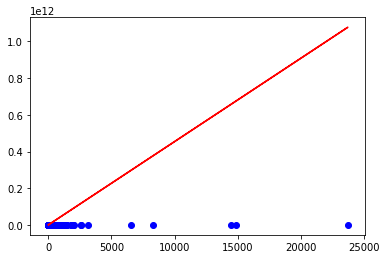

In [11]:
for i in range(df.shape[0]):
    x, y = df.iloc[i, 0], df.iloc[i, 1]
    plt.scatter(x, y, c='b')

plt.plot(input, y_preds, c='r')

plt.show()